In [ ]:
## reference : https://www.youtube.com/watch?v=DG7YTlGnCEo

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [39]:
img = plt.imread('flower.jpg')

img_r,img_g,img_b = img[:,:,0], img[:,:,1], img[:,:,2] 
print(img.shape)

(440, 660, 3)


In [40]:
# color channel 각각에 대해서 singular value decomposition을 수행한다.

U_r, sigma_r, V_t_r = np.linalg.svd(img_r)
U_g, sigma_g, V_t_g = np.linalg.svd(img_g)
U_b, sigma_b, V_t_b = np.linalg.svd(img_b)


In [41]:
def low_rank_approximation(img, rank = 1 ):
    assert rank <= min(img.shape), 'rank should smaller than shorter side of image'
    u, sig, v_t = np.linalg.svd(img)
    
    # sigma_diagonal = np.eye(rank)
    # np.fill_diagonal(sigma_diagonal, sig[:rank])
    
    approximation = np.zeros((u.shape[0], v_t.shape[0]))
    for i in range(rank):
        approximation += sig[i] * np.outer(u[:,i], v_t[i])
    
    # approximation = np.outer( (sigma_diagonal @ u[:,:rank].T ).T,  v_t[:rank,:])

    return approximation


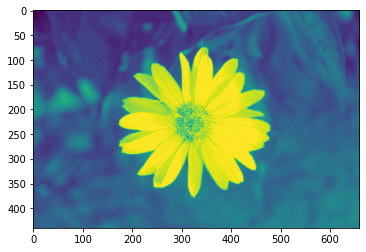

In [42]:
plt.imshow(img_r)

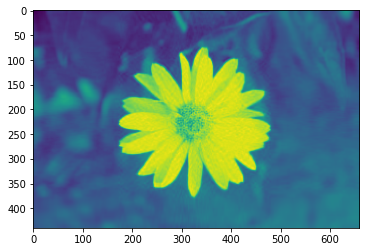

In [43]:
plt.imshow(low_rank_approximation(img_r, rank = 50))

In [44]:


def color_rank_approximation_r(img, rank = 1) :
    img_r, img_g, img_b = img[:,:,0], img[:,:,1], img[:,:,2]
    rank_approximation_r = low_rank_approximation(img_r, rank = rank)
    rank_approximation_g = low_rank_approximation(img_g, rank = rank)
    rank_approximation_b = low_rank_approximation(img_b, rank = rank)

    return np.uint8(np.dstack([rank_approximation_r, rank_approximation_g, rank_approximation_b])) # uint8 값으로 변환

In [60]:
color_approximation = color_rank_approximation_r(img, rank = 5)

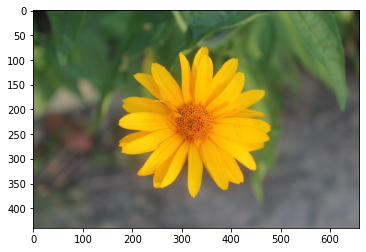

In [46]:
plt.imshow(img)

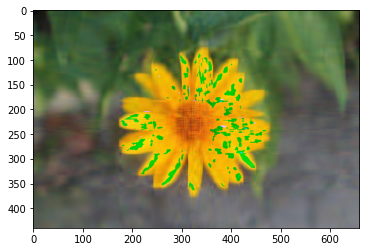

In [58]:
plt.imshow(color_approximation)

In [61]:
plt.imsave('flower_rank_approximation_rank=5.jpg', color_approximation)